In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import clima_anom as ca
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

In [2]:
file_shape = '../shp/Brasil.shp'
shape = list(shpreader.Reader(file_shape).geometries())

In [3]:
data_dir = '../data/Hgt_500hPa_Anomalies_Jan80_Dec83.nc'
data = ca.read_netcdf(data_dir,2)
lat = data['lat']
lon = data['lon']
hgt = data['hgt']

lat : (73,)
lon : (144,)
time : (480,)
hgt : (480, 73, 144)


In [4]:
hgt_dic = ca.clima_anom(hgt)


Keys level 1:  dict_keys(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dec'])
keys level 2:  dict_keys(['data', 'clim', 'anom'])

Numbers of years:  40
Numbers of months:  480


In [5]:
nordeste = ca.extract_shapefile('../shp/Brasil.shp',hgt_dic['jan']['data'],lat,lon)

Shapes ID len:  1


In [6]:
lon2d, lat2d = np.meshgrid(lon, lat)

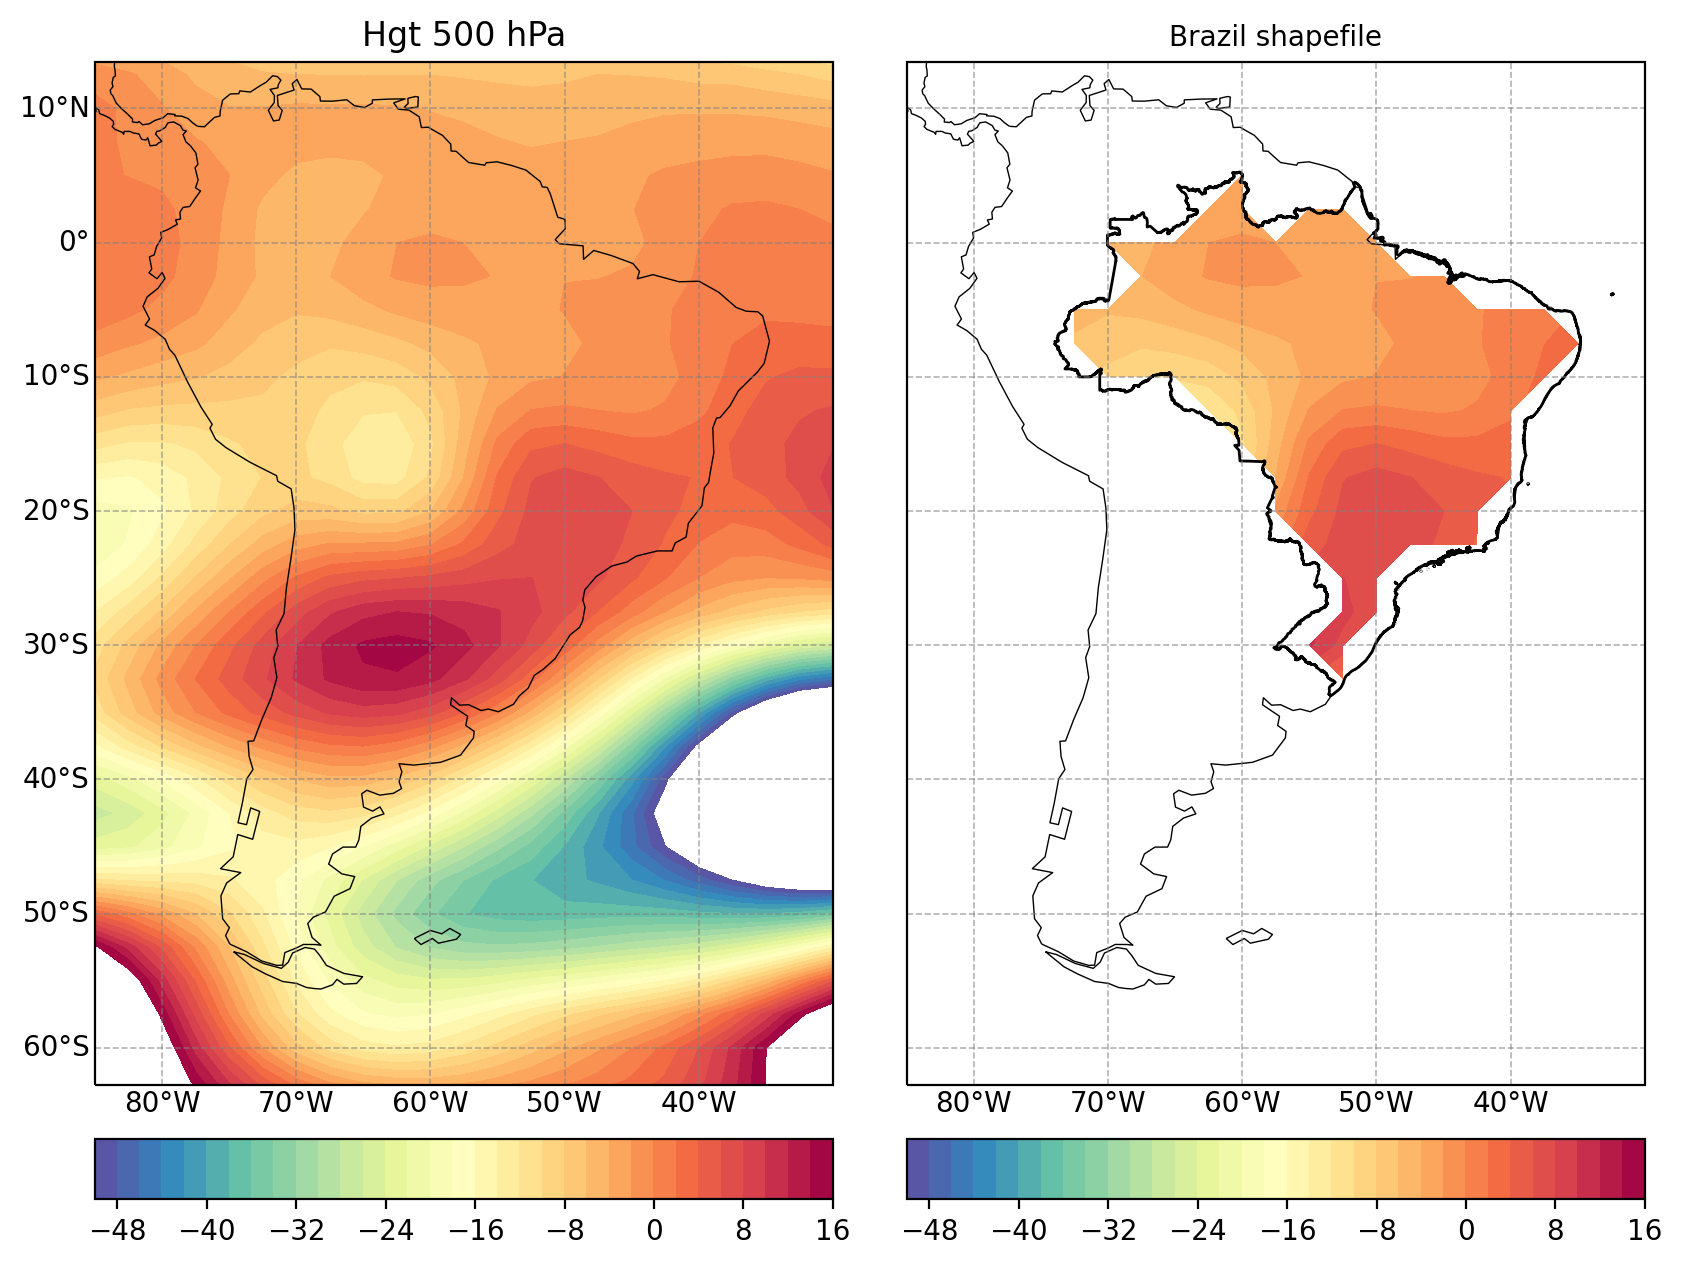

In [7]:
levels = np.arange(-50,17,2)
cmap = plt.cm.Spectral_r
fig = plt.figure(figsize=(10,10),dpi=200)

proj = ccrs.PlateCarree()
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linewidth=0.5)
ax1.set_extent([-85,-30,-60,12])
a1 = ax1.contourf(lon2d, lat2d, hgt_dic['jan']['data'][0,:,:],levels=levels,cmap = cmap)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
ax1.set_title('Hgt 500 hPa',fontsize= 12)

ax2 = plt.subplot(gs[0, 1], projection = proj)
ax2.coastlines(linewidth=0.5)
ax2.set_extent([-85,-30,-60,12])
a2 = ax2.contourf(lon2d, lat2d, nordeste[0,:,:],levels=levels,cmap = cmap)
ax2.add_geometries(shape,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=1)
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
ax2.set_title('Brazil shapefile',fontsize= 10)

cbaxes = fig.add_axes([0.125, 0.19, 0.369, 0.03]) 
cbar = fig.colorbar(a1, cax = cbaxes,orientation="horizontal",ticks=None)
cbar.ax.get_yaxis().labelpad = 15

cbaxes = fig.add_axes([0.531, 0.19, 0.369, 0.03]) 
cbar = fig.colorbar(a2, cax = cbaxes,orientation="horizontal",ticks=None)
cbar.ax.get_yaxis().labelpad = 15

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.1, wspace=0.1)

plt.savefig('../fig/Extract_shapefile.png',transparent = False,bbox_inches ='tight',pad_inches = 0.1)